In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
data = pd.read_csv("BSDS_November.csv")

In [12]:
data[data['TotalCharges'] == ' ']

,gender,Partner,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
71,Female,Yes,No,DSL,Yes,Two year,Credit card (automatic),56.05,,No
2208,Male,Yes,Yes,No,No internet service,Two year,Mailed check,25.35,,No
2523,Male,Yes,Yes,No,No internet service,One year,Mailed check,19.70,,No
2692,Male,Yes,Yes,No,No internet service,Two year,Mailed check,19.85,,No
3763,Female,Yes,Yes,DSL,Yes,Two year,Mailed check,80.85,,No
4812,Male,No,Yes,No,No internet service,Two year,Mailed check,20.25,,No
4819,Female,Yes,Yes,No,No internet service,Two year,Mailed check,20.00,,No
5132,Female,Yes,No,DSL,Yes,Two year,Bank transfer (automatic),52.55,,No
5388,Male,Yes,Yes,No,No internet service,Two year,Mailed check,25.75,,No


In [13]:
data.head()

,gender,Partner,PhoneService,InternetService,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,DSL,Yes,Two year,Mailed check,39.70,692.35,No
1,Male,No,Yes,DSL,No,Month-to-month,Bank transfer (automatic),46.05,80.35,Yes
2,Male,Yes,Yes,Fiber optic,Yes,Month-to-month,Electronic check,91.80,5960.5,No
3,Male,Yes,Yes,No,No internet service,One year,Credit card (automatic),19.80,576.65,No
4,Male,Yes,Yes,Fiber optic,Yes,One year,Bank transfer (automatic),89.45,5692.65,No


<AxesSubplot:>

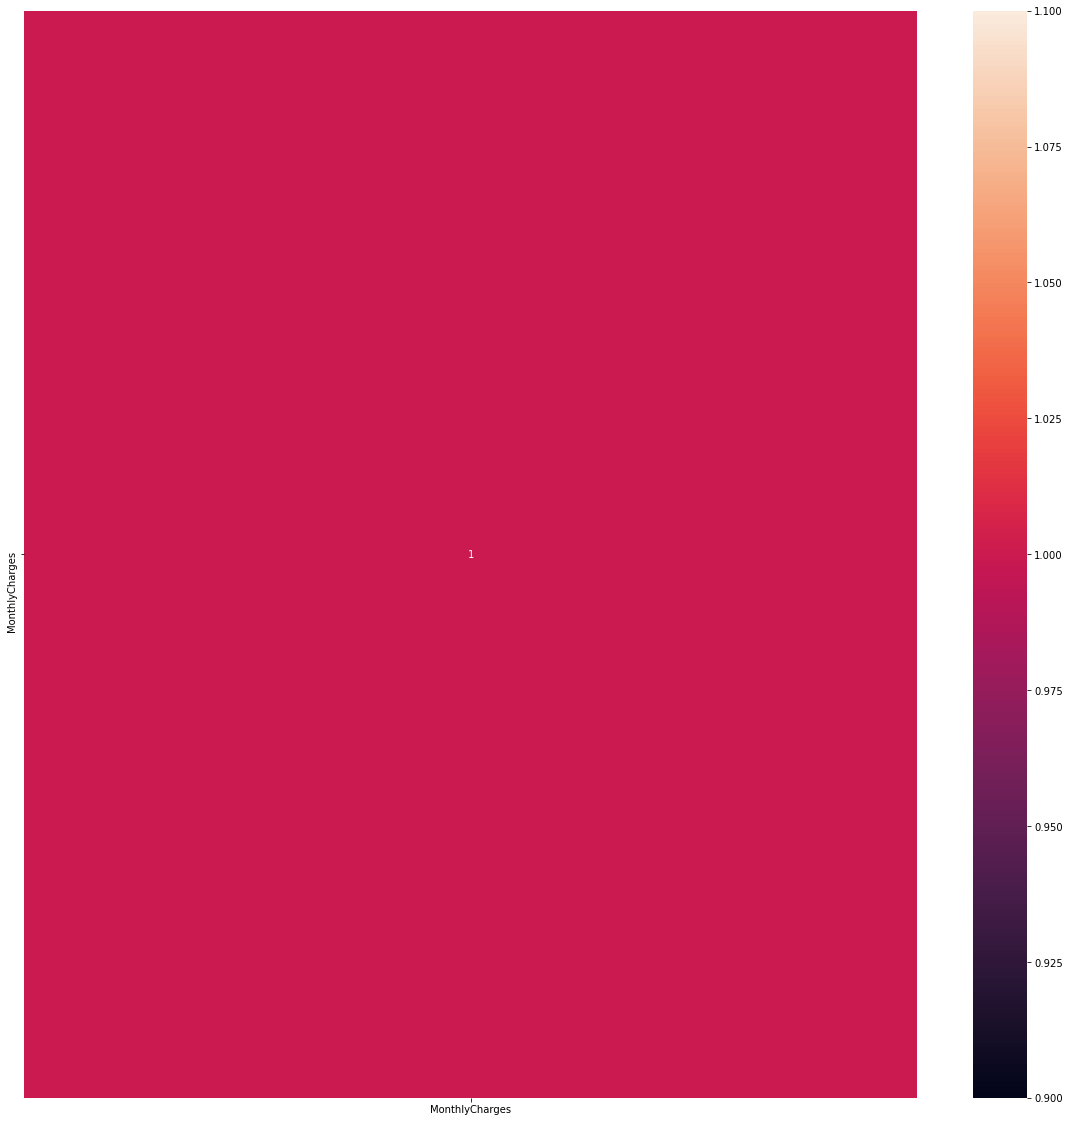

In [14]:
plt.figure(figsize=(20,20))
churn_corr = data.corr()
churn_corr_top = churn_corr.index
sns.heatmap(data[churn_corr_top].corr(), annot=True)

In [20]:
categorical_features = ['InternetService',  'Contract', 'PaymentMethod', 'OnlineSecurity']
numerical_features = ['MonthlyCharges', 'TotalCharges']
binary_features = ['gender', 'Partner', 'PhoneService']

In [21]:
filt = (data["TotalCharges"] == ' ')
#data = data[~filt]

median = data.loc[~filt,"TotalCharges"].astype('float').median()
data.loc[filt, "TotalCharges"] = str(median)
data["TotalCharges"] = data["TotalCharges"].astype('float')

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

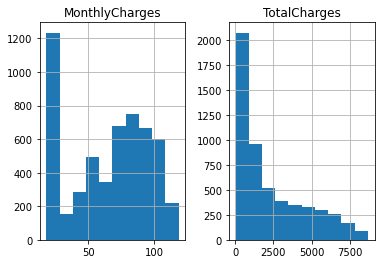

In [22]:
data[numerical_features].hist()

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

cat_features = encoder.fit_transform(data[categorical_features])
bin_features = ordinal_encoder.fit_transform(data[binary_features])

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(data['Churn'])

In [25]:
num_features = data[numerical_features].to_numpy()
cat_features = cat_features.toarray()

df = np.hstack((cat_features, bin_features, num_features))
df.shape

(5423, 18)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, train_size=0.8)
print(f'Positive samples: {np.sum(y_train)}, Negative samples: {len(y_train)-np.sum(y_train)}')

Positive samples: 1180, Negative samples: 3158


In [27]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [64]:
model = Sequential()

In [65]:
model.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_shape = (18,)))
classifier.add(Dropout(0.1))

In [66]:
model.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
model.add(Dropout(0.1))

In [67]:
model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [68]:
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)


Train on 2906 samples, validate on 1432 samples
Epoch 1/100
2906/2906 [==============================] - 0s 146us/step - loss: 0.6109 - accuracy: 0.6545 - val_loss: 0.5469 - val_accuracy: 0.7444
Epoch 2/100
2906/2906 [==============================] - 0s 86us/step - loss: 0.5131 - accuracy: 0.7381 - val_loss: 0.5199 - val_accuracy: 0.7542
Epoch 3/100
2906/2906 [==============================] - 0s 90us/step - loss: 0.4881 - accuracy: 0.7512 - val_loss: 0.5048 - val_accuracy: 0.7563
Epoch 4/100
2906/2906 [==============================] - 0s 102us/step - loss: 0.4741 - accuracy: 0.7543 - val_loss: 0.4963 - val_accuracy: 0.7584
Epoch 5/100
2906/2906 [==============================] - 0s 83us/step - loss: 0.4611 - accuracy: 0.7646 - val_loss: 0.4927 - val_accuracy: 0.7640
Epoch 6/100
2906/2906 [==============================] - 0s 85us/step - loss: 0.4605 - accuracy: 0.7688 - val_loss: 0.4866 - val_accuracy: 0.7668
Epoch 7/100
2906/2906 [==============================] - 0s 81us/step - l

Epoch 55/100
2906/2906 [==============================] - 0s 89us/step - loss: 0.4240 - accuracy: 0.7922 - val_loss: 0.4552 - val_accuracy: 0.7737
Epoch 56/100
2906/2906 [==============================] - 0s 96us/step - loss: 0.4236 - accuracy: 0.7942 - val_loss: 0.4552 - val_accuracy: 0.7758
Epoch 57/100
2906/2906 [==============================] - 0s 102us/step - loss: 0.4234 - accuracy: 0.7928 - val_loss: 0.4551 - val_accuracy: 0.7737
Epoch 58/100
2906/2906 [==============================] - 0s 97us/step - loss: 0.4266 - accuracy: 0.7873 - val_loss: 0.4551 - val_accuracy: 0.7737
Epoch 59/100
2906/2906 [==============================] - 0s 95us/step - loss: 0.4226 - accuracy: 0.7946 - val_loss: 0.4546 - val_accuracy: 0.7744
Epoch 60/100
2906/2906 [==============================] - 0s 88us/step - loss: 0.4208 - accuracy: 0.7973 - val_loss: 0.4546 - val_accuracy: 0.7751
Epoch 61/100
2906/2906 [==============================] - 0s 87us/step - loss: 0.4188 - accuracy: 0.7949 - val_loss: 

In [74]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


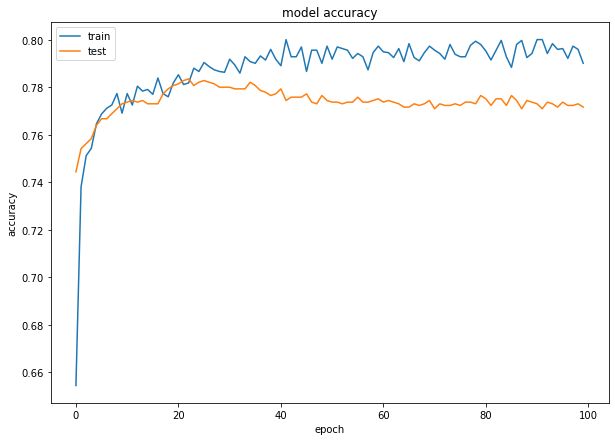

In [75]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

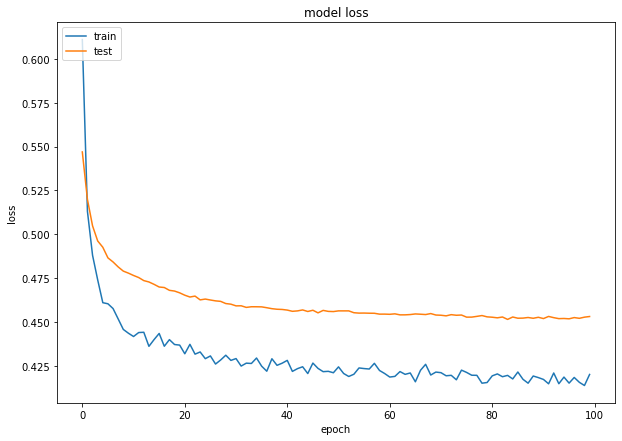

In [76]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[744,  89],
       [128, 124]])

In [81]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8

In [82]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [84]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, kernel_initializer = 'he_uniform',activation=activation,input_dim = X_train.shape[1]))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes, kernel_initializer = 'he_uniform',activation=activation))
            model.add(Dropout(0.1))
            
    model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [86]:
model = KerasClassifier(build_fn=create_model, verbose=0)
layers = [(6, 3, 3), (10, 10), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid_result = grid.fit(X_train, y_train)

In [127]:
[grid_result.best_score_,grid_result.best_params_]

[0.7874616622924805,
 {'activation': 'relu',
  'batch_size': 256,
  'epochs': 30,
  'layers': (45, 30, 15)}]